In [1]:
%matplotlib inline
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

/anaconda3/envs/mlearning/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [31]:
import os

In [29]:
data_folder = "/Users/yw18581/Downloads/Hands-On-Image-Processing-with-Python-master/images"

In [34]:
data_out = "/Users/yw18581/Downloads/Hands-On-Image-Processing-with-Python-master/images_out"

In [35]:
!mkdir data_out

### Reading, saving and displaying an image using PIL

In [11]:
im = Image.open("/Users/yw18581/Downloads/pexels-photo-635279.jpeg")

In [12]:
print("width:{}, heigth: {}, mode: {}, format: {}, type: {}".format(im.width, im.height, im.mode, im.format, type(im)))

width:579, heigth: 385, mode: RGB, format: JPEG, type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [13]:
im.show()

### Convert 

In [14]:
im_g = im.convert('L')

In [15]:
im_g.show()

In [17]:
im_g.save("/Users/yw18581/Downloads/sea_gray.png")

In [18]:
Image.open("/Users/yw18581/Downloads/sea_gray.png").show()

### Reading, saving and displaying an image using Matplotlib

In [6]:
im = np.array(mpimg.imread("/Users/yw18581/Downloads/pexels-photo-635279.jpeg"))

In [7]:
print(im.shape, im.dtype, type(im))

(385, 579, 3) uint8 <class 'numpy.ndarray'>


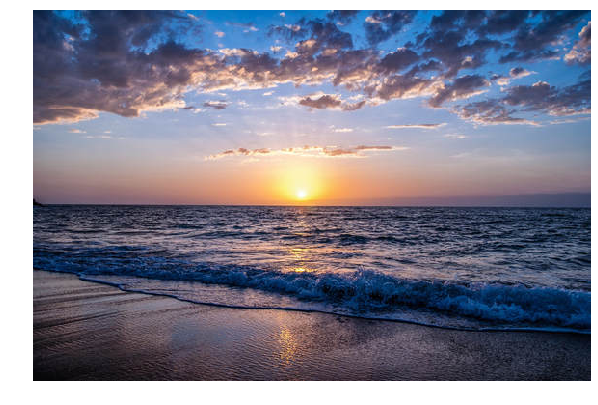

In [8]:
plt.figure(figsize = (10,10))
plt.imshow(im)
plt.axis('off')
plt.show()

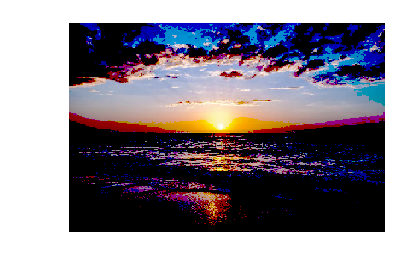

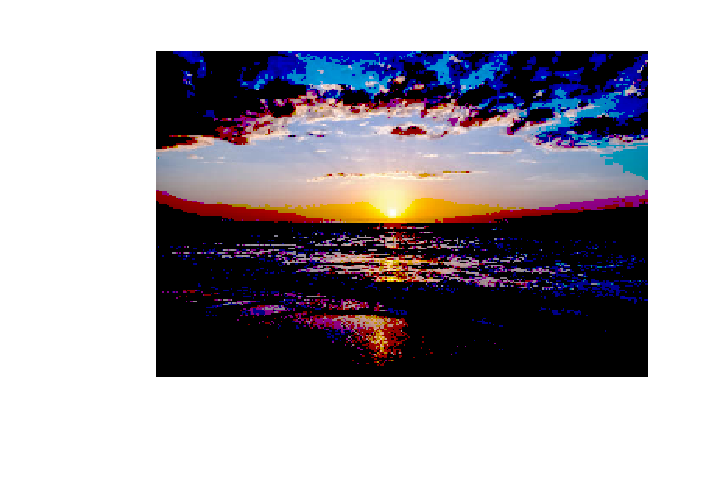

In [10]:
im1 = im
im1[im1 < 0.5] =0
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("/Users/yw18581/Downloads/sea_dark.png")
im = mpimg.imread("/Users/yw18581/Downloads/sea_dark.png")
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off')
plt.tight_layout()
plt.show()

###  Plotting with different interpolation methods in matplotlib

In [11]:
im = mpimg.imread("/Users/yw18581/Downloads/Unknown-2.png")

In [12]:
methods = ['none', 'nearest', 'bilinear', 'bicubic','spline16', 'lanczos']

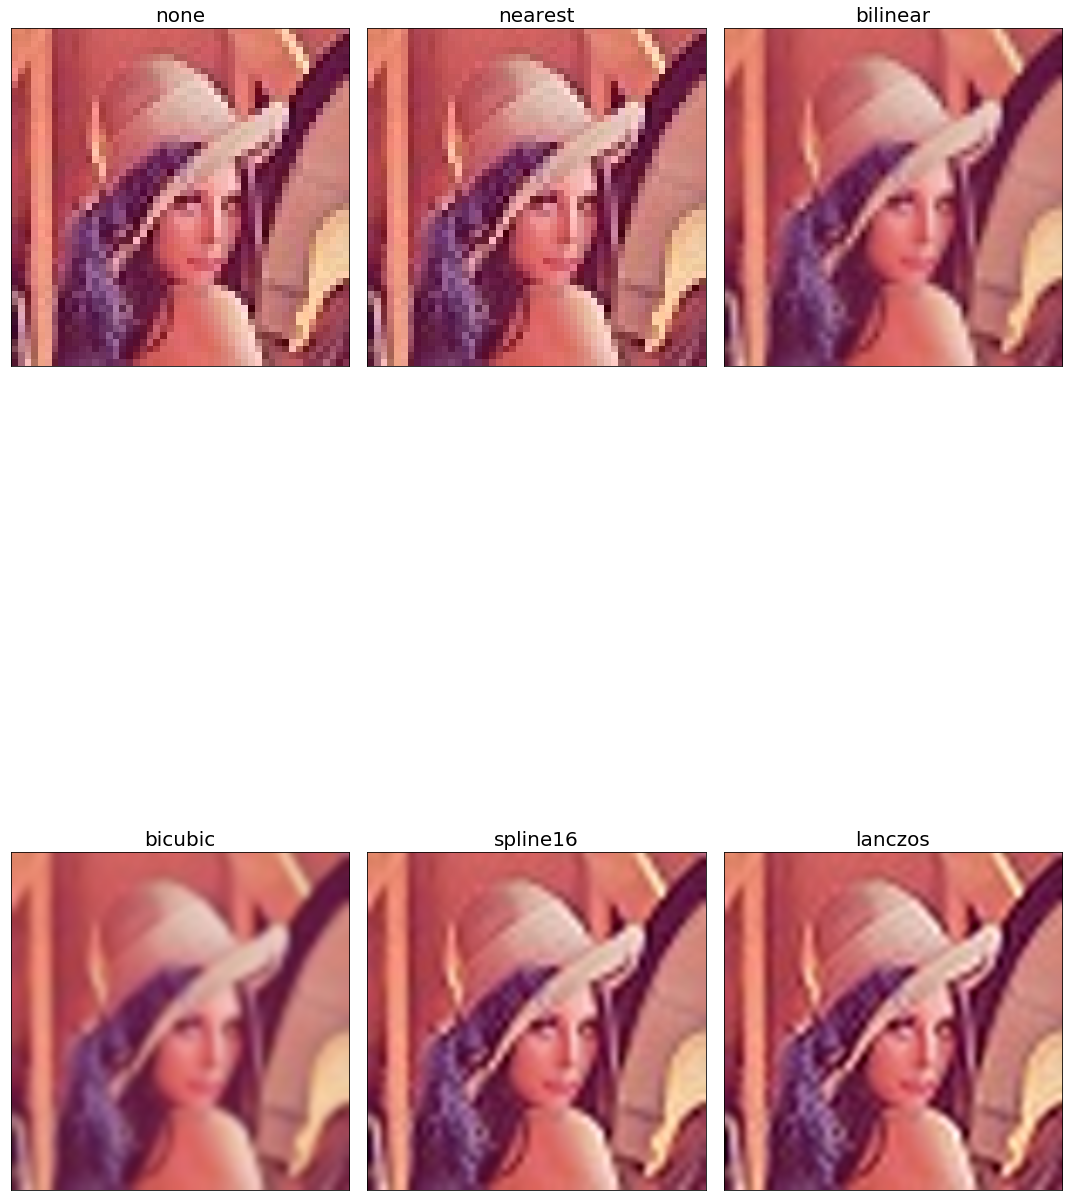

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,30), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()
                         

### Reading, saving and displaying an image using scikit-image

In [19]:
im = imread("/Users/yw18581/Downloads/parrot.png")
print(im.shape, im.dtype, type(im))

(340, 453, 3) uint8 <class 'numpy.ndarray'>


In [21]:
hsv = color.rgb2hsv(im)
hsv[:,:,1] = 0.5
im1 = color.hsv2rgb(hsv)
imsave("/Users/yw18581/Downloads/parrot_hsv.png",im1)

/anaconda3/envs/mlearning/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


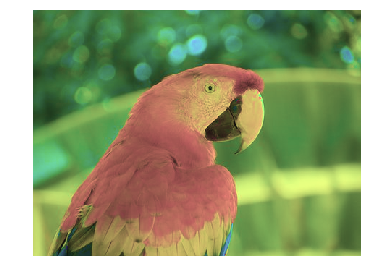

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x125a4a940>, None)

In [22]:
imhsv = imread("/Users/yw18581/Downloads/parrot_hsv.png")
plt.axis('off'), imshow(imhsv), show()

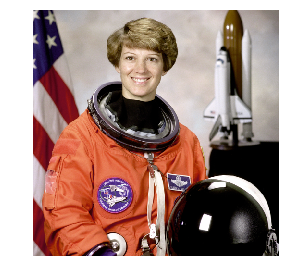

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x125a18208>, None)

In [24]:
im = data.astronaut() 
plt.axis('off'),imshow(im), show()

### Reading, saving, and displaying an image using scipy misc

/anaconda3/envs/mlearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


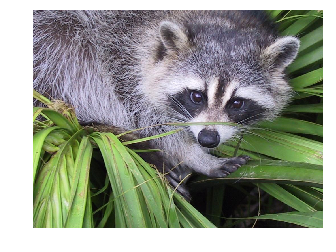

(<matplotlib.image.AxesImage at 0x1277f8f60>,
 (-0.5, 1023.5, 767.5, -0.5),
 None)

In [26]:
im = misc.face()
misc.imsave('/Users/yw18581/Downloads/face.png', im)
plt.imshow(im), plt.axis('off'), plt.show()

In [ ]:
im = misc.imread('../images/pepper.jpg')
print(type(im), im.shape, im.dtype)
# <class 'numpy.ndarray'> (225, 225, 3) uint8

### Converting from one file format to another

In [27]:
im = Image.open("/Users/yw18581/Downloads/parrot.png")
print(im.mode)

RGB


In [28]:
im.save("/Users/yw18581/Downloads/parrot.jpg")

In [39]:
im = Image.open(os.path.join(data_folder, "hill.png"))

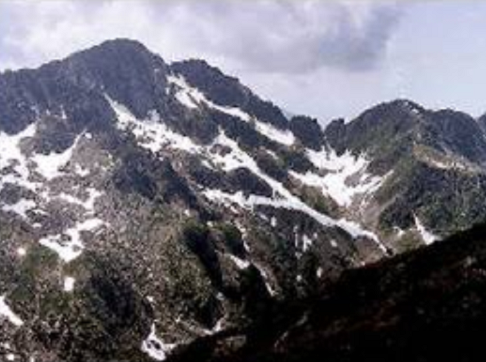

In [40]:
im

In [33]:
print(im.mode)

RGBA


In [41]:
irgb = im.convert('RGB')

In [47]:
irgb.save(os.path.join(data_out, "hill.jpg"))

In [50]:
im = imread(os.path.join(data_folder, "parrot.png"), as_gray=True)

In [51]:
print(im.shape)

(362, 486)


In [52]:
im = imread(os.path.join(data_folder, "Ishihara.png"))

In [53]:
im_g = color.rgb2gray(im)

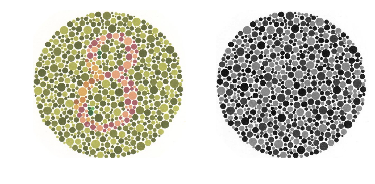

In [54]:
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

### Drawing contou lines for an image with matplotlib/

In [56]:
image = color.rgb2gray(imread("/Users/yw18581/physics/10x10_25mm_8bit_clean/File_0.tiff"))

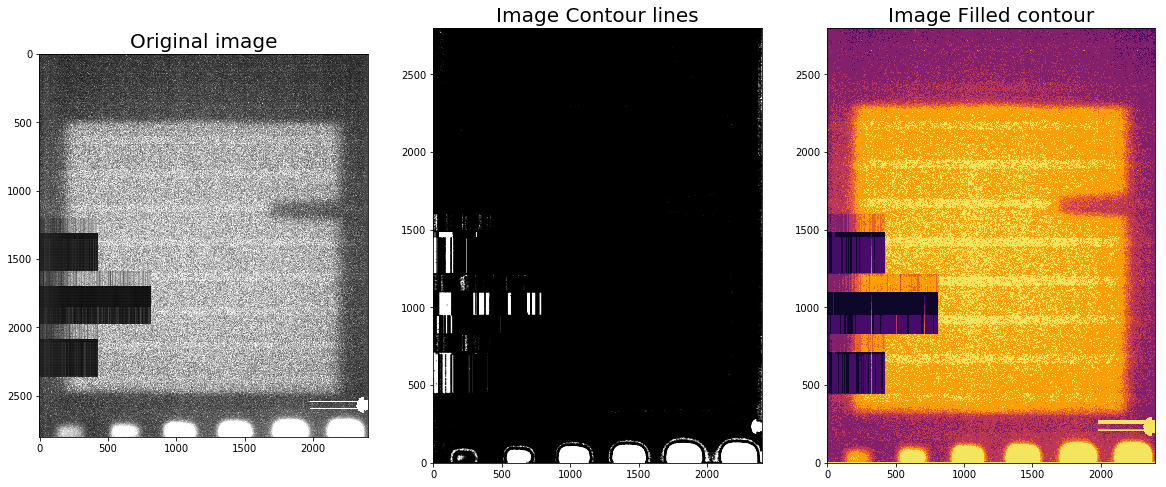

In [58]:
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original image', size=20)
plt.subplot(132), plt.contour(np.flipud(image), colors='k', levels=np.logspace(-15,15,100))
plt.title('Image Contour lines',size=20)
plt.subplot(133), plt.title('Image Filled contour',size=20), plt.contourf(np.flipud(image), cmap='inferno')
plt.show()